Работу выполнила студентка БЭК212 Екатерина Фейденгеймер.

In [1]:
import numpy as np
import random
import pandas as pd 
import scipy.stats as sts
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 4)

**Задание 3**

Начнём с функции для построения наивного бутстрэпа.
Источник: https://github.com/hse-econ-data-science/andan_2023/blob/main/sem13_bootstrap/sem13_bootstrap_simulations_bonus.ipynb

In [103]:
def quantile_ci(x_boot, alpha=0.05):
    left = np.quantile(x_boot, alpha/2)
    right = np.quantile(x_boot, 1-alpha/2)
    return left, right

Теперь функция для бутстрэпа t-статистики.

In [104]:
def t_ci(x_boot, std_boot, theta_hat, sd_hat, alpha=0.05):
    d = (x_boot - theta_hat)/std_boot
    left = theta_hat - np.quantile(d, 1-alpha/2)*sd_hat
    right = theta_hat - np.quantile(d, alpha/2)*sd_hat
    return left, right

Асимптотический доверительный интервал

In [123]:
def asym_ci(theta_hat, sd_hat, alpha=0.05):
    ci = sts.norm.interval(1-alpha, theta_hat, sd_hat/np.sqrt(sample_size))
    return ci[0], ci[1]

Экспоненциальное распределение несимметрично относительно нуля и обладает длинным хвостом.

In [106]:
np.random.seed(20)

n_int = 10**4     # число интервалов 
sample_size = 20  # размеры выборок

rv = sts.expon(scale=1)
theta_real = rv.mean()   # настоящий параметр
std_real = rv.std()

# генерируем n_int выборок
X = rv.rvs((n_int, sample_size))
X.shape

(10000, 20)

In [107]:
theta_real

1.0

In [108]:
std_real

1.0

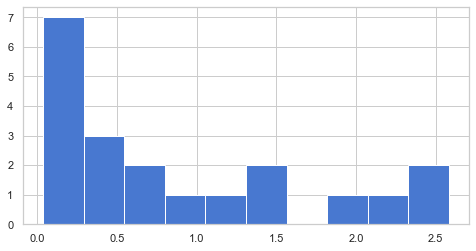

In [10]:
plt.hist(X[4]);

Функция для бутстрэпа.

In [109]:
def get_bootstrap_sample(x, B_sample=1):
    N = x.size 
    sample = np.random.choice(x, size=(N, B_sample), replace=True)
    
    if B_sample == 1:
        sample = sample.T[0]
    return sample

а) Симуляции

In [125]:
B = 10**4 # сколько делть бустрап-выборок
np.random.seed(20)
# счётчики для проверки как часто мы попали в интервал реальным параметром
i_q, i_t, i_as = 0, 0, 0

for i in tqdm(range(n_int)):
    x = X[i] # взяли i-ую выборку 
    
    # оценки по выборке 
    theta_hat, sd_hat = np.mean(x), np.std(x, ddof =1)  
    
    # бутстрап-статистики 
    x_boot = get_bootstrap_sample(x, B_sample=B)
    std_boot = np.std(x_boot, axis=0)
    x_boot = np.mean(x_boot, axis=0)
    
    # quantile CI
    left1, right1 = quantile_ci(x_boot)
    i_q += (left1 < theta_real < right1)
    
    # t-percentile CI
    left2, right2 = t_ci(x_boot, std_boot, theta_hat, sd_hat)
    i_t += (left2 < theta_real < right2)
    
    # asymptotic CI
    left3, right3 = asym_ci(theta_hat, sd_hat)
    i_as += (left3 < theta_real < right3)
    
    # Напечатать интервалы после первой итерации
    if i == 0: 
        print('quantile:', left1, right1)
        print('t-percentile:', left2, right2)
        print('asymptotic:', left3, right3)

  0%|          | 0/10000 [00:00<?, ?it/s]

quantile: 0.659876878240941 1.290288959920688
t-percentile: 0.6309745662150354 1.3517532946365243
asymptotic: 0.6484984870623296 1.2929957897222035


Посмотрим на оценку получившихся частот.

In [126]:
i_q/n_int, i_t/n_int, i_as/n_int

(0.9061, 0.9496, 0.9072)

в.1) __Итог__: Близкой к 0.95 оказалась только вторая частота. Первая и третья довольно сильно от неё отличаются. Навиный бутстрэп даёт смещённые оценки границ доверительного интервала, асимптотический ДИ тоже даёт неудовлетворительный результат. При этом t-процентильный интервал показывает результаты ближе к заявленному уровню доверия, то есть здесь это лучший способ.

Проведём тот же эксперимент для симметричного распределения.

In [128]:
np.random.seed(20)

rv = sts.t(df=3)
theta_real = rv.mean()   # настоящий параметр
std_real = rv.std()

# генерируем n_int выборок
X = rv.rvs((n_int, sample_size))
X.shape

(10000, 20)

In [129]:
theta_real

0.0

In [130]:
std_real

1.7320508075688772

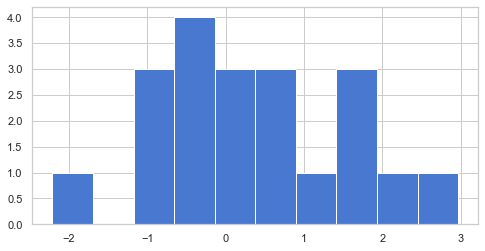

In [131]:
plt.hist(X[5]);

б) Симуляции.

In [132]:
B = 10**4 # сколько делть бутстрап-выборок
np.random.seed(20)
# счётчики для проверки как часто мы попали в интервал реальным параметром
i_q, i_t, i_as = 0, 0, 0

for i in tqdm(range(n_int)):
    x = X[i] # взяли i-ую выборку 
    
    # оценки по выборке 
    theta_hat, sd_hat = np.mean(x), np.std(x)  
    
    # бутстрап-статистики 
    x_boot = get_bootstrap_sample(x, B_sample=B)
    std_boot = np.std(x_boot, axis=0)
    x_boot = np.mean(x_boot, axis=0)
    
    # quantile CI
    left1, right1 = quantile_ci(x_boot)
    i_q += (left1 < theta_real < right1)
    
    # t-percentile CI
    left2, right2 = t_ci(x_boot, std_boot, theta_hat, sd_hat)
    i_t += (left2 < theta_real < right2)
    
    # asymptotic CI
    left3, right3 = asym_ci(theta_hat, sd_hat)
    i_as += (left3 < theta_real < right3)
    
    # Напечатать интервалы после первой итерации
    if i == 0: 
        print('quantile:', left1, right1)
        print('t-percentile:', left2, right2)
        print('asymptotic:', left3, right3)

  0%|          | 0/10000 [00:00<?, ?it/s]

quantile: -0.1145644997711833 1.617367345613751
t-percentile: -0.10118882405040708 2.1824889222259514
asymptotic: -0.18370996040476661 1.5444721931891463


Посмотрим на оценку получившихся частот.

In [133]:
i_q/n_int, i_t/n_int, i_as/n_int

(0.9194, 0.9249, 0.9371)

в.2) __Итог__: На симметричном распределении оба метода бутстрэпа показывают похожие, но довольно далёкие от заявленного уровня значимости результаты. Асимптотический интервал показывает результат, близкий к заявленному уровню значимости, то есть здесь это лучший способ.

Для задач 4, 5 и 6 потребуются данные по результатам экзамена по теории вероятностей этого года по 30-балльной шкале.

**Задание 4**

Подгружаем таблицу с фамилиями и результатами.

In [5]:
df = pd.read_excel(r'C:\Users\anfey\Desktop\proba_score.xlsx')
df

,surnames,score
0,Репенкова,16
1,Ролдугина,0
2,Сафина,19
3,Сидоров,26
4,Солоухин,21
...,...,...
327,Сенников,19
328,Ся,0
329,Сятова,0
330,Темиркулов,0


Выполним преобразование, которое оставит только первую букву фамилии.

In [6]:
df2 = df
letters = df2.surnames.apply(lambda x: x.lower()[0])
letters

0      р
1      р
2      с
3      с
4      с
      ..
327    с
328    с
329    с
330    т
331    э
Name: surnames, Length: 332, dtype: object

Создадим колонку 'consonant' - 'согласные'. Если имя начинается с согласной, ставим значение 1, если с гласной - значение 0.

In [7]:
dfl = pd.DataFrame({'letter': letters, 'score': df['score']})
dfl['consonant'] = 1
dfl

,letter,score,consonant
0,р,16,1
1,р,0,1
2,с,19,1
3,с,26,1
4,с,21,1
...,...,...,...
327,с,19,1
328,с,0,1
329,с,0,1
330,т,0,1


In [8]:
c1 = (dfl['letter'] == 'а')
c2 = (dfl['letter'] == 'у')
c3 = (dfl['letter'] == 'о')
c4 = (dfl['letter'] == 'ы')
c5 = (dfl['letter'] == 'э')
c6 = (dfl['letter'] == 'я')
c7 = (dfl['letter'] == 'ю')
c8 = (dfl['letter'] == 'ё')
c9 = (dfl['letter'] == 'и')
c10 = (dfl['letter'] == 'е')
vowels = dfl[c1 | c2 | c3 | c4 | c5 | c6 | c7 | c8 | c9 | c10]
vow = vowels.index
len(vow)

49

In [9]:
dfl.loc[vow, 'consonant'] = 0

In [10]:
dfl[dfl['consonant'] == 0].shape # проверка

(49, 3)

In [11]:
cons = dfl[dfl['consonant'] == 1]['score']
vow = dfl[dfl['consonant'] == 0]['score']

Проверим гипотезу о том, что ожидаемые результаты экзамена по теории вероятностей тех, у кого фамилия начинается с гласной буквы и с согласной буквы, равны. В качестве альтернативной гипотезы возьмём гипотезу о неравенстве.

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{cons} = \mu_{vow} \\
& H_1: \mu_{cons} \neq \mu_{vow}
\end{aligned}
$$


а) **Тест Уэлча**

Для теста Уэлча используем втроенную функцию $\text{scipy.stats.ttest_ind}$ с опцией, которая не предполагает одинаковую дисперсию выборок.

In [13]:
sts.ttest_ind(vow, cons, equal_var=False)

Ttest_indResult(statistic=-0.8519661870595602, pvalue=0.3974027153843839)

In [14]:
round(0.3974027153843839, 2)

0.4

P-value примерно равно 0.4, поэтому на уровне значимости 5% нет оснований отвергать нулевую гипотезу о равенстве результатов.

г) **Перестановочный тест**

Теперь проведём перестановочный тест. Референс: https://medium.com/@whystudying/resampling-with-python-permutation-test-19421dc38dac

In [157]:
scores_all = list(df['score'])
print(scores_all[0:10])

[16, 0, 19, 26, 21, 22, 20, 17, 20, 21]


In [158]:
n_simulations = 10**4
n_cons = 283
np.random.seed(20)
simulated_diffs = []

for i in tqdm(range(n_simulations)):
    scores_shuffled = np.random.permutation(scores_all)
    scores_cons_simulated = scores_shuffled[:n_cons]
    scores_vow_simulated = scores_shuffled[n_cons:]
    simulated_diff = np.mean(scores_cons_simulated) - np.mean(scores_vow_simulated)
    simulated_diffs.append(simulated_diff)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [20]:
real_diff = np.mean(cons) - np.mean(vow)
real_diff

1.0782433114588574

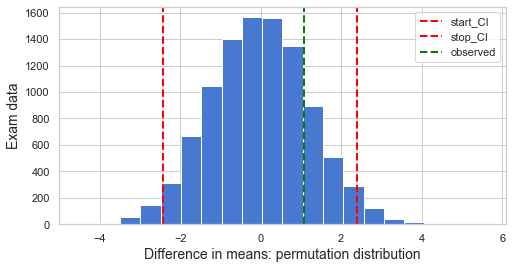

In [159]:
l = np.array(simulated_diffs)
plt.hist(simulated_diffs, bins = 20);
plt.axvline(np.percentile(l, 2.5), color='red', linestyle="--", lw=2, label='start_CI')
plt.axvline(np.percentile(l, 97.5), color='red', linestyle="--", lw=2, label='stop_CI')
plt.axvline(real_diff, color='green', linestyle="--", lw=2, label='observed')
plt.ylabel("Exam data", fontsize=14)
plt.xlabel("Difference in means: permutation distribution", fontsize=14)
plt.legend();

In [104]:
upper_tail_q = len([x for x in simulated_diffs if x >= real_diff])
lower_tail_q = len([x for x in simulated_diffs if x < real_diff])
p_value = 2 * min( (upper_tail_q/n_simulations), (lower_tail_q/n_simulations) )
p_value

0.3662

P-value также примерно равно 0.4, поэтому на уровне значимости 5% нет оснований отвергать нулевую гипотезу о равенстве результатов. Более того, наблюдаемое значение входит в ДИ, то есть нулевая гипотеза не отвергается.

б) **Наивный бутстрэп**

In [144]:
B = 10**4 # сколько делть бустрап-выборок
np.random.seed(20)
boot_diffs = []

for i in tqdm(range(n_simulations)):
    
    # бутстрап-статистики для согласных
    cons_boot = get_bootstrap_sample(cons)
    mean_boot_cons = np.mean(cons_boot)
    
    # бутстрап-статистики для гласных
    vow_boot = get_bootstrap_sample(vow)
    mean_boot_vow = np.mean(vow_boot)
    
    # наивный бутстрэп
    boot_diff = mean_boot_cons - mean_boot_vow
    boot_diffs.append(boot_diff)
    

  0%|          | 0/10000 [00:00<?, ?it/s]

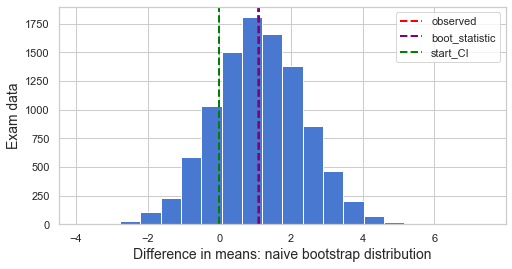

In [145]:
plt.hist(boot_diffs, bins = 20);
plt.axvline(real_diff, color='red', linestyle="--", lw=2, label='observed')
plt.axvline(np.mean(boot_diffs), color='purple', linestyle="--", lw=2, label='boot_statistic')
plt.axvline(0, color='green', linestyle="--", lw=2, label='start_CI')
plt.ylabel("Exam data", fontsize=14)
plt.xlabel("Difference in means: naive bootstrap distribution", fontsize=14)
plt.legend();

In [146]:
upper_tail_q = len([x for x in boot_diffs if x >= 0])
lower_tail_q = len([x for x in boot_diffs if x <=0])
p_value = 2 * min(1- (upper_tail_q/n_simulations), 1-(lower_tail_q/n_simulations) )
p_value

0.3740000000000001

P-value также примерно равно 0.4, поэтому на уровне значимости 5% нет оснований отвергать нулевую гипотезу о равенстве результатов.

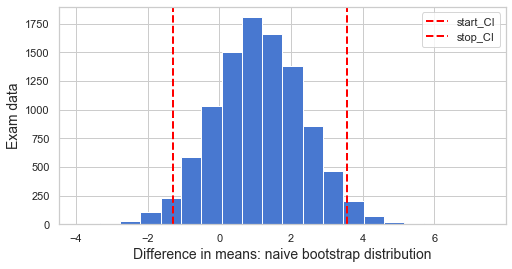

In [147]:
l = np.array(boot_diffs)
plt.hist(boot_diffs, bins = 20);
plt.axvline(np.percentile(l, 2.5), color='red', linestyle="--", lw=2, label='start_CI')
plt.axvline(np.percentile(l, 97.5), color='red', linestyle="--", lw=2, label='stop_CI')
plt.ylabel("Exam data", fontsize=14)
plt.xlabel("Difference in means: naive bootstrap distribution", fontsize=14)
plt.legend();

Дополнительно построим 95% ДИ. 0 попадает в ДИ, поэтому на данном уровне значимости нет оснований отвергать H0.

в) **Бутстрэп t-статистики**

In [152]:
# для большого числа наблюдений работает без знания дисперсий и предположений о нормальности
t_obs = real_diff / np.sqrt( (np.std(cons)**2 / cons.size) + (np.std(vow)**2 / vow.size) ) 
t_obs

0.8597828196161025

In [153]:
np.std(vow) - np.std(cons)

0.2866413963134731

In [150]:
B = 10**4 # сколько делть бустрап-выборок
np.random.seed(20)
boot_ts = []

for i in tqdm(range(n_simulations)):
    
    # бутстрап-статистики для согласных
    cons_boot = get_bootstrap_sample(cons)
    std_boot_cons = np.std(cons_boot)
    mean_boot_cons = np.mean(cons_boot)
    
    # бутстрап-статистики для гласных
    vow_boot = get_bootstrap_sample(vow)
    std_boot_vow = np.std(vow_boot)
    mean_boot_vow = np.mean(vow_boot)
    
    # бутстрэп t-статистики
    t_boot = ( (mean_boot_cons-mean_boot_vow) - real_diff)/ np.sqrt( (np.std(cons_boot)**2 / cons_boot.size) + (np.std(vow_boot)**2 / vow_boot.size) )
    boot_ts.append(t_boot)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [154]:
upper_tail_q = len([x for x in boot_ts if x >= t_obs])
lower_tail_q = len([x for x in boot_ts if x < t_obs])
p_value = 2 * min( (upper_tail_q/n_simulations), (lower_tail_q/n_simulations) )
p_value

0.393

P-value примерно равно 0.39, поэтому на уровне значимости 5% нет оснований отвергать нулевую гипотезу о равенстве результатов.

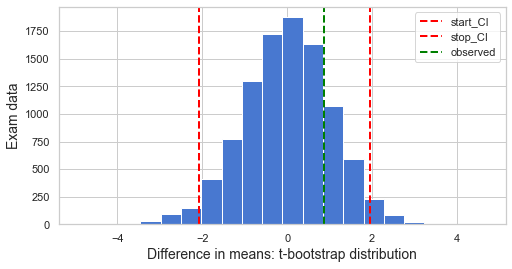

In [155]:
l = np.array(boot_ts)
plt.hist(boot_ts, bins = 20);
plt.axvline(np.percentile(l, 2.5), color='red', linestyle="--", lw=2, label='start_CI')
plt.axvline(np.percentile(l, 97.5), color='red', linestyle="--", lw=2, label='stop_CI')
plt.axvline(t_obs, color='green', linestyle="--", lw=2, label='observed')
plt.ylabel("Exam data", fontsize=14)
plt.xlabel("Difference in means: t-bootstrap distribution", fontsize=14)
plt.legend();

Дополнительно построим 95% ДИ. Наблюдаемое значение попадает в ДИ, поэтому на данном уровне значимости нет оснований отвергать H0.

**Задание 5**

In [161]:
med = dfl['score'].median()

In [162]:
df_cons = pd.DataFrame(cons)
df_vow = pd.DataFrame(vow)

In [163]:
cons_higher = df_cons[df_cons['score'] > med]
cons_lower = df_cons[df_cons['score'] <= med]
vow_higher = df_vow[df_vow['score'] > med]
vow_lower = df_vow[df_vow['score'] <= med]

In [164]:
contingency_table = np.array([[len(cons_higher), len(cons_lower)], [len(vow_higher), len(vow_lower)]])
contingency_table

array([[145, 138],
       [ 21,  28]])

а) **Асимптотический интервал для отношения шансов хорошо написать экзамен («несогласных» к «согласным»).**

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: OR = 1 \\
& H_1: OR \neq 1
\end{aligned}
$$


In [23]:
OR_hat = (21/28) / (145/138) 
round(OR_hat, 2)

0.71

Используем полученную на семинаре формулу для ДИ для отношения шансов.

In [34]:
alpha = 0.05
za = sts.norm.ppf(1 - alpha/2)
za

1.959963984540054

In [35]:
se_hat = np.sqrt(1/145 + 1/138 + 1/21 + 1/28)
se_hat

0.3122118861751831

In [36]:
left = OR_hat * np.exp(-za * se_hat)
right = OR_hat * np.exp(za * se_hat)
print(f'OR in [{left}, {right}]')

OR in [0.38709459582547806, 1.3162172761513564]


Оценка отношения шансов, 0.71, лежит в ДИ, поэтому нулевая гипотеза о равенстве отношения шансов 1 не отвергается.

In [37]:
Z_obs = np.log(OR_hat) / se_hat
Z_obs

-1.0799144576000155

In [38]:
p_value = 2 * min( sts.norm.cdf(Z_obs), 1 - sts.norm.cdf(-Z_obs) )
print(f'P-значение равно {round(p_value, 2)}')

P-значение равно 0.28


б) **Асимптотический интервал для отношения вероятностей хорошо написать экзамен.**

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: RR = 1 \\
& H_1: RR \neq 1
\end{aligned}
$$

In [40]:
contingency_table

array([[145, 138],
       [ 21,  28]])

In [41]:
RR_hat = (21/(28+21)) / (145/(138+145))
round(RR_hat, 2)

0.84

Используем аналогично формулу для ДИ для отношения вероятностей из 'Calculating Confidence Intervals For Relative Risks (Odds Ratios) And Standardised Ratios And Rates' by JULIE A MORRIS, MARTIN J GARDNER: https://www.jstor.org/stable/29530653

In [42]:
se_hat_proba = np.sqrt(1/145 + 1/21 - 1/(145+138) - 1/(21+28))
se_hat_proba

0.17485384517729596

In [43]:
left_proba = RR_hat * np.exp(-za * se_hat_proba)
right_proba = RR_hat * np.exp(za * se_hat_proba)
print(f'RR in [{left_proba}, {right_proba}]')

RR in [0.5937529565040844, 1.1783586951819993]


Оценка отношения вероятностей, 0.84, лежит в ДИ, поэтому нулевая гипотеза о равенстве отношения вероятностей 1 не отвергается.

In [44]:
Z_obs_RR = np.log(RR_hat) /se_hat_proba
Z_obs_RR

-1.0213370199749479

In [45]:
p_value = 2 * min( sts.norm.cdf(Z_obs_RR), 1 - sts.norm.cdf(-Z_obs_RR) )
print(f'P-значение равно {round(p_value, 2)}')

P-значение равно 0.31


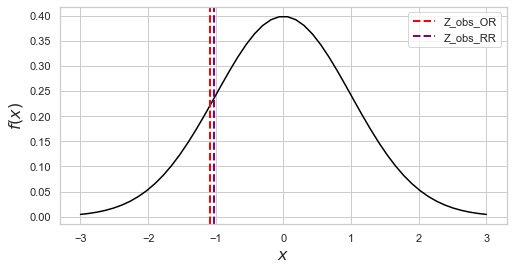

In [46]:
plt.figure(figsize = (8, 4))
x = np.linspace(-3, 3)
pdf = sts.norm().pdf(x)
plt.plot(x, pdf, color="black")
plt.axvline(Z_obs, color='red', linestyle="--", lw=2, label='Z_obs_OR')
plt.axvline(Z_obs_RR, color='purple', linestyle="--", lw=2, label='Z_obs_RR')
plt.ylabel("$f(x)$", fontsize=16)
plt.xlabel("$x$", fontsize=16)
plt.legend();

в) **Интервал для отношения шансов хорошо написать экзамен с помощью наивного бутстрэпа.**

In [135]:
B = 10**4 # сколько делть бустрап-выборок
np.random.seed(20)
odds_ratios = []

for i in tqdm(range(n_simulations)):
    
    cons_boot = get_bootstrap_sample(cons)
    vow_boot = get_bootstrap_sample(vow)
    df_cons_boot = pd.DataFrame(cons_boot)
    df_vow_boot = pd.DataFrame(vow_boot)

    med_boot = np.median(np.concatenate((cons_boot, vow_boot)))
    cons_higher_boot = len(df_cons_boot[df_cons_boot[0] > med_boot][0])
    cons_lower_boot = len(df_cons_boot[df_cons_boot[0] <= med_boot][0])
    vow_higher_boot = len(df_vow_boot[df_vow_boot[0] > med_boot][0])
    vow_lower_boot = len(df_vow_boot[df_vow_boot[0] <= med_boot][0])
    
    OR_boot = (vow_higher_boot/vow_lower_boot)/(cons_higher_boot/cons_lower_boot)
    odds_ratios.append(OR_boot)

  0%|          | 0/10000 [00:00<?, ?it/s]

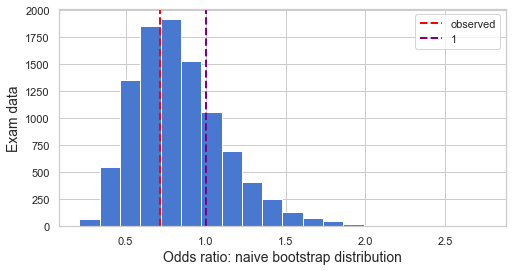

In [171]:
plt.hist(odds_ratios, bins = 20);
plt.axvline(OR_hat, color='red', linestyle="--", lw=2, label='observed')
plt.axvline(1, color='purple', linestyle="--", lw=2, label='1')
plt.ylabel("Exam data", fontsize=14)
plt.xlabel("Odds ratio: naive bootstrap distribution", fontsize=14)
plt.legend();

In [167]:
upper_tail_q = len([x for x in odds_ratios if x > 1])
lower_tail_q = len([x for x in odds_ratios if x < 1])
p_value = 2 * min(1- (upper_tail_q/n_simulations), 1-(lower_tail_q/n_simulations) )
print(f'P-значение равно {round(p_value, 2)}')

P-значение равно 0.5


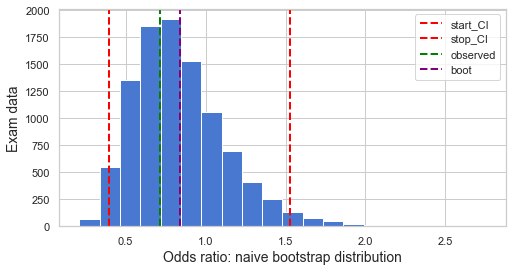

In [143]:
l = np.array(odds_ratios)
plt.hist(odds_ratios, bins = 20);
plt.axvline(np.percentile(l, 2.5), color='red', linestyle="--", lw=2, label='start_CI')
plt.axvline(np.percentile(l, 97.5), color='red', linestyle="--", lw=2, label='stop_CI')
plt.axvline(OR_hat, color='green', linestyle="--", lw=2, label='observed')
plt.axvline(np.mean(odds_ratios), color='purple', linestyle="--", lw=2, label='boot')
plt.ylabel("Exam data", fontsize=14)
plt.xlabel("Odds ratio: naive bootstrap distribution", fontsize=14)
plt.legend();

In [139]:
print(f'OR in [{np.percentile(l, 2.5)}, {np.percentile(l, 97.5)}]')

OR in [0.39676273193841294, 1.525252525252525]


Дополнительно построим 95% ДИ. Наблюдаемое значение попадает в ДИ, поэтому на данном уровне значимости нет оснований отвергать H0.

**Задание 6**

In [13]:
df3 = df
length = df3.surnames.apply(lambda x: len(x))
length

0       9
1       9
2       6
3       7
4       8
       ..
327     8
328     2
329     6
330    10
331     6
Name: surnames, Length: 332, dtype: int64

In [14]:
df_len = pd.DataFrame({'sur_len': length, 'score': df['score']})
df_len

,sur_len,score
0,9,16
1,9,0
2,6,19
3,7,26
4,8,21
...,...,...
327,8,19
328,2,0
329,6,0
330,10,0


а) Найдём выборочную корреляцию.

In [55]:
corr_hat = sts.pearsonr(df_len['sur_len'], df_len['score'])[0]
corr_hat

0.0253280526691477

In [34]:
F_sum = df_len['sur_len'].sum()
F_sum

2610

In [33]:
Y_hat = df_len['score'].mean()

Выборочная корреляция близка к 0. 

Считаем, что наблюдения независимы и одинаково распределены. Тогда $E(Y_i) = \mu = E(\overline{Y})$. 

$E(\overline{Y}) = E(Y) = E(\frac{\Sigma{Y_i}}{n}) = \frac{1}{n}\Sigma E({Y_i}) = \frac{\beta}{n} \Sigma {F_i}$

$\frac{\beta}{332} \cdot {2610}  = \overline{Y}$

In [41]:
beta_hat = Y_hat/(2610/332)
print(f'Оценка beta методом моментов: {round(beta_hat, 2)}')

Оценка beta методом моментов: 2.06


б) **Проведём перестановочный тест**.

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \rho = 0 \\
& H_1: \rho \neq 0
\end{aligned}
$$

In [59]:
n_simulations = 10**4
np.random.seed(20)
corr_perm = []

for i in tqdm(range(n_simulations)):
    scores_shuffled = np.random.permutation(df_len['score'])
    corr_sim = sts.pearsonr(df_len['sur_len'], scores_shuffled)[0]
    corr_perm.append(corr_sim)

  0%|          | 0/10000 [00:00<?, ?it/s]

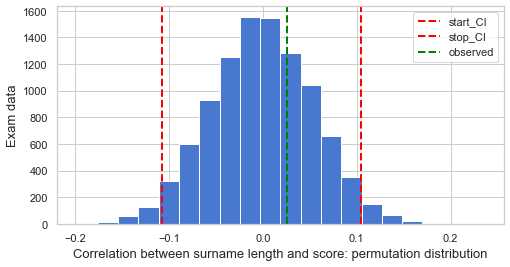

In [63]:
l = np.array(corr_perm)
plt.hist(corr_perm, bins = 20);
plt.axvline(np.percentile(l, 2.5), color='red', linestyle="--", lw=2, label='start_CI')
plt.axvline(np.percentile(l, 97.5), color='red', linestyle="--", lw=2, label='stop_CI')
plt.axvline(corr_hat, color='green', linestyle="--", lw=2, label='observed')
plt.ylabel("Exam data", fontsize=13)
plt.xlabel("Correlation between surname length and score: permutation distribution", fontsize=13)
plt.legend();

In [64]:
upper_tail_q = len([x for x in corr_perm if x >= corr_hat])
lower_tail_q = len([x for x in corr_perm if x < corr_hat])
p_value = 2 * min( (upper_tail_q/n_simulations), (lower_tail_q/n_simulations) )
p_value

0.636

P-value примерно равно 0.6, поэтому на уровне значимости 5% нет оснований отвергать нулевую гипотезу о равенстве корреляции нулю. Более того, наблюдаемое значение входит в ДИ, то есть нулевая гипотеза не отвергается.

**Задание 7**

Я чудесно провела время за разговором с chatgpt, обсуждали такую задачу из старых вариантов кр: 

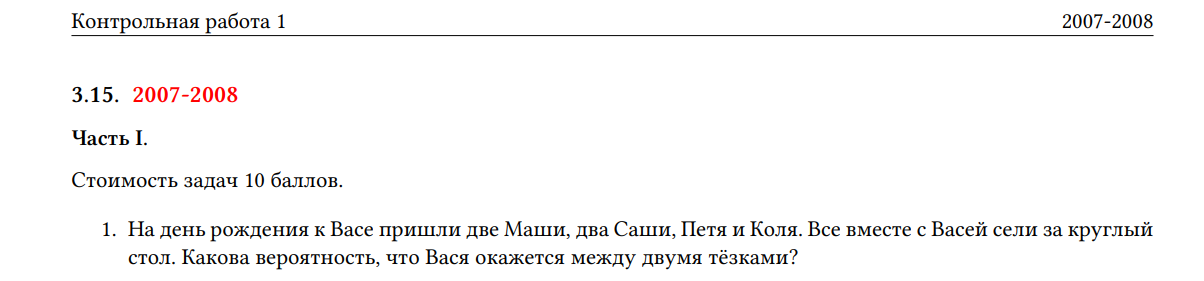

Я использовала расширение ChatGPT Sidebar, так как сам сервис выдавал ошибку 'слишком много запросов в час' после первого сообщения.
Вот такой получился диалог:

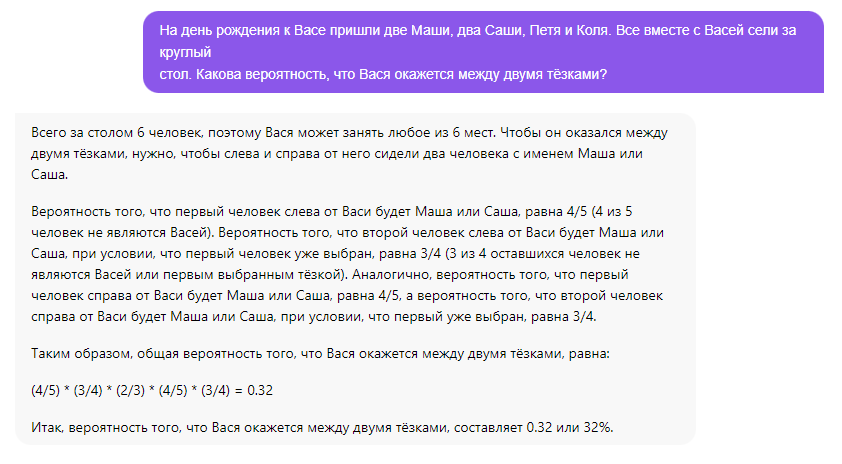


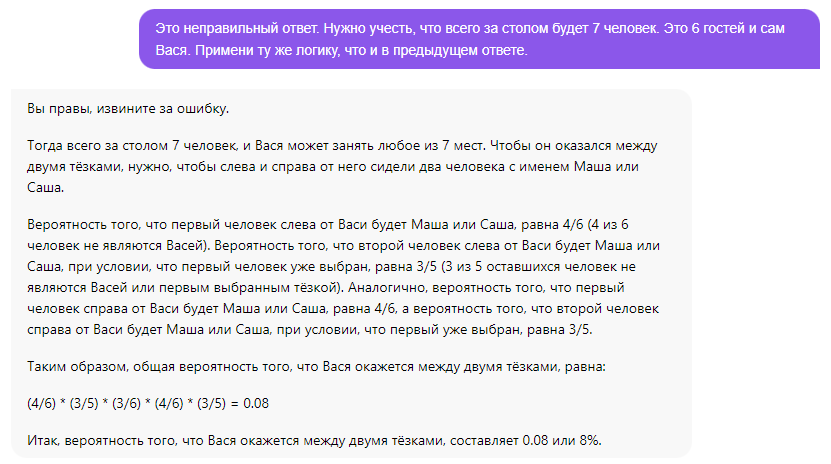

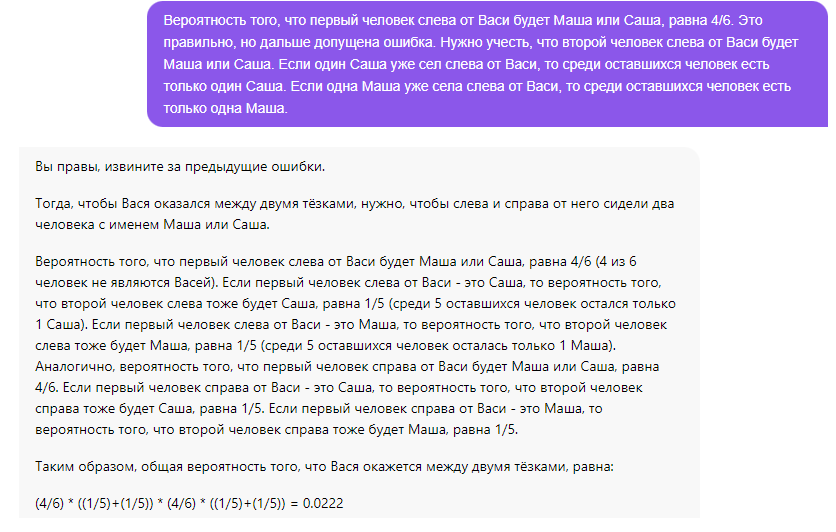

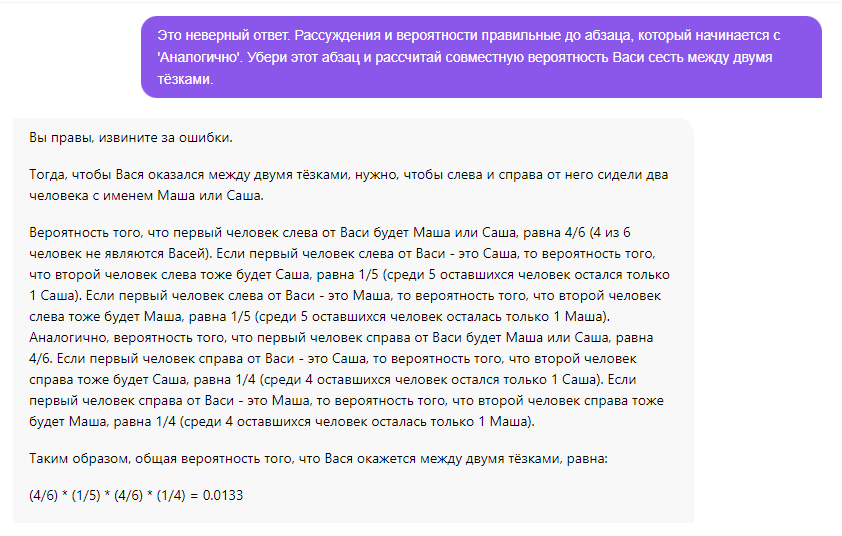

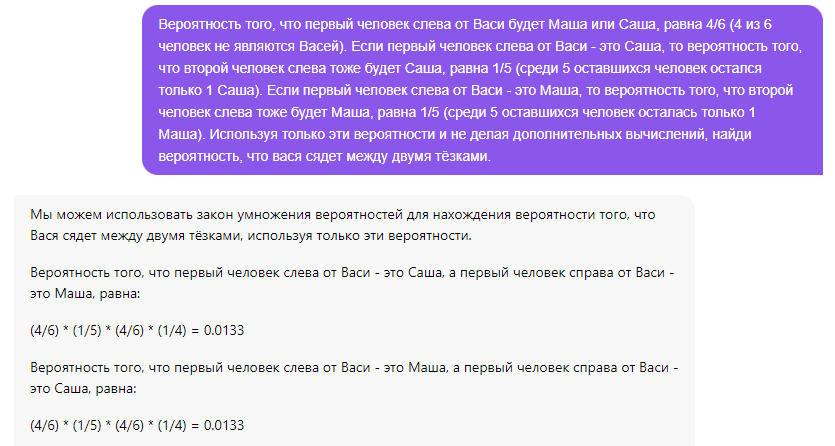

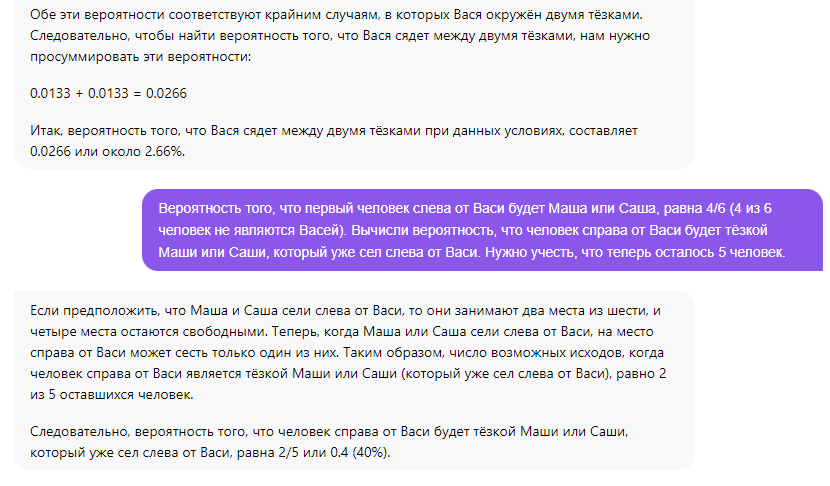

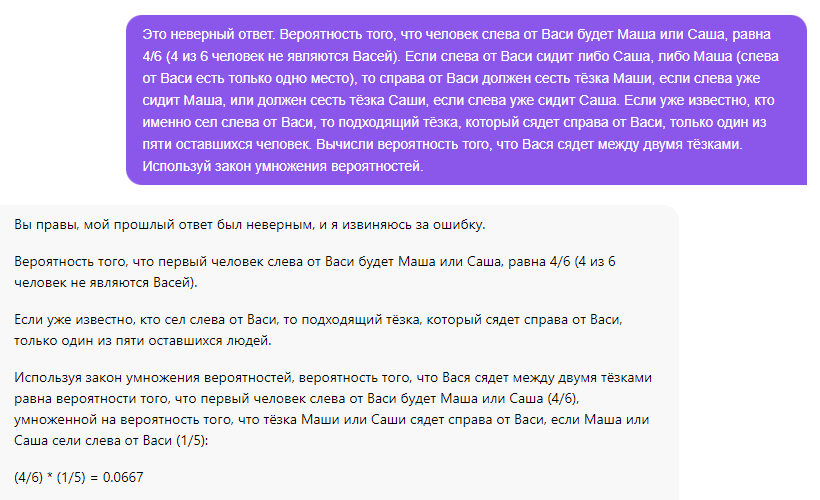

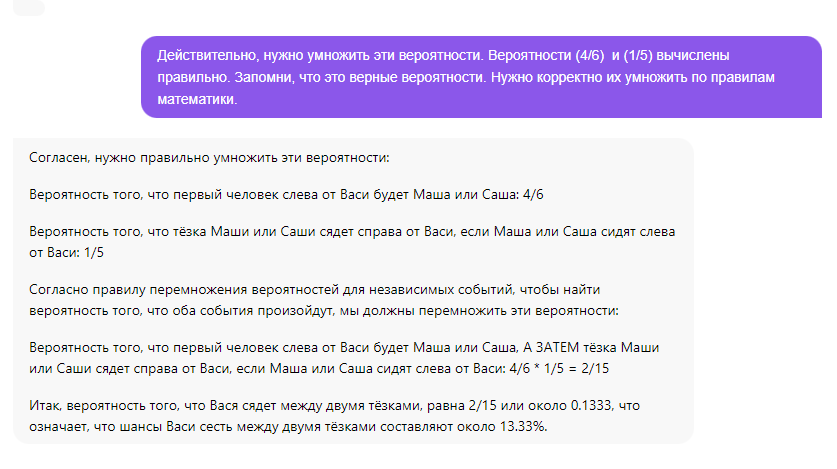

Ура!

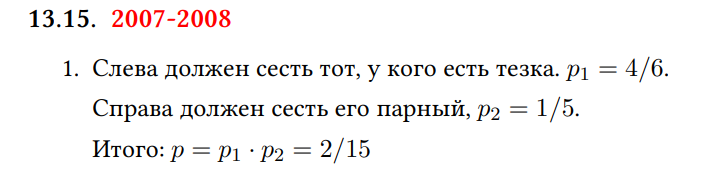

**Задание 8**

В этом семестре мне был полезен YouTube канал "StatQuest with Josh Starmer": https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw

Джош очень понятно и наглядно объясняет некоторые понятия или методы в статистике и машинном обучении.

Мне очень помогает визуальное восприятие, поэтому, например, после семинара про отношение шансов я посмотрела видео "Odds and Log(Odds), Clearly Explained!!!". Стало понятнее, как именно логарифм отношения шансов делает всё симметричным, позволяет сравнивать отношения шансов и проверять гипотезы.

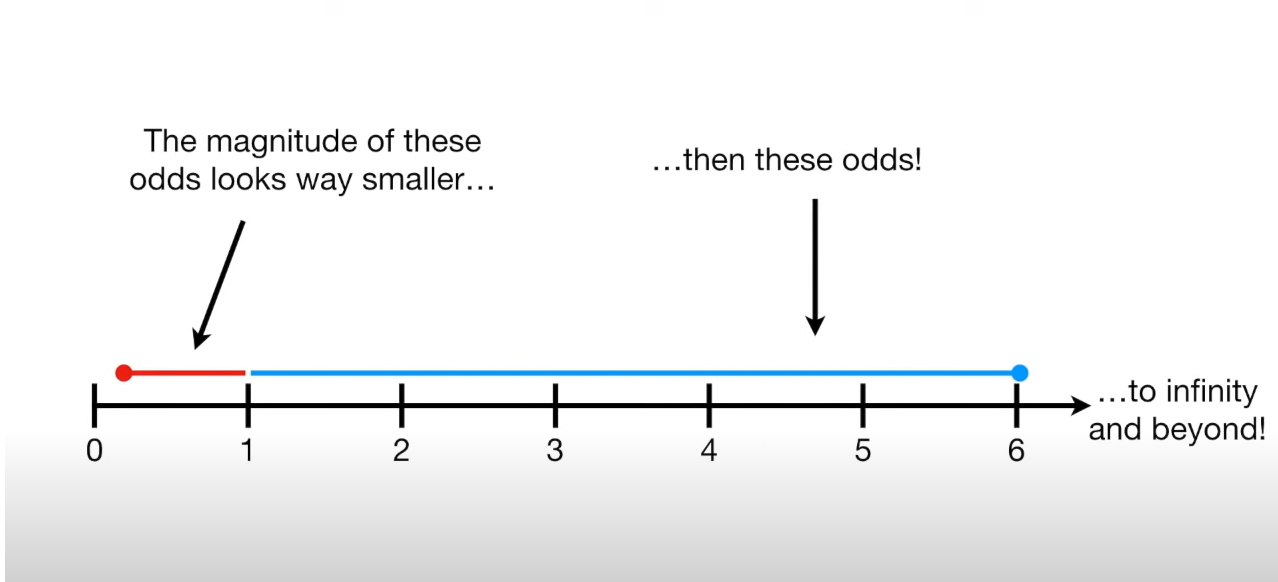

Источник: https://www.youtube.com/watch?v=ARfXDSkQf1Y&ab_channel=StatQuestwithJoshStarmer

Ещё видео "Bootstrapping Main Ideas!!!" наглядно объяснило идею бутстрапа с цветными точками и постепенным построением гистограммы :)

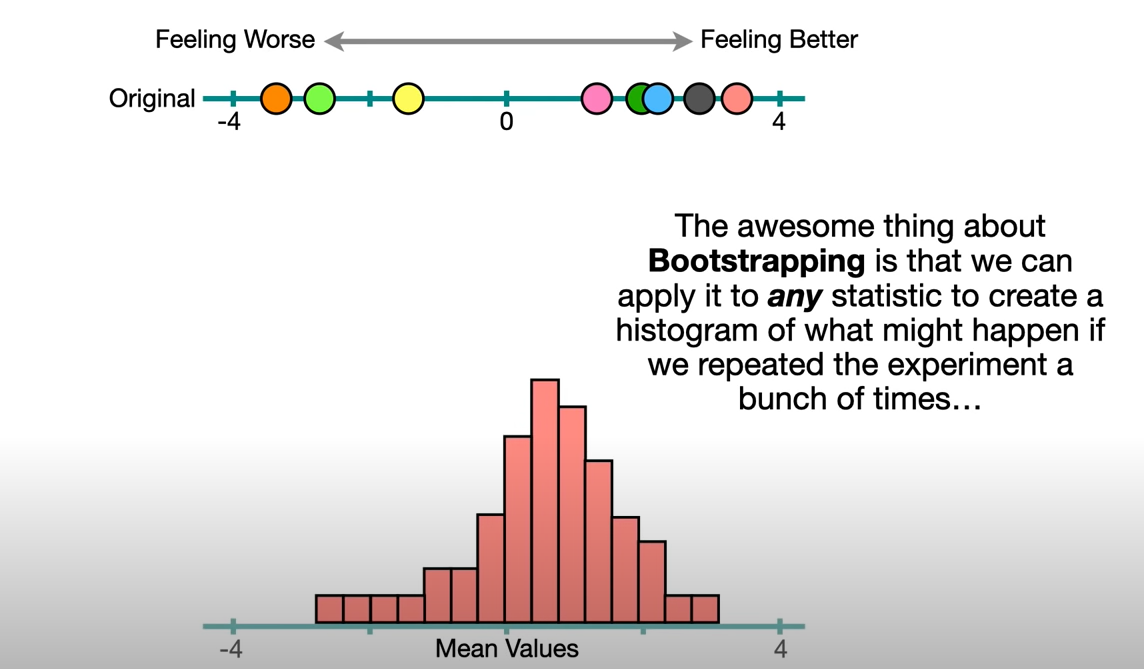

Источник: https://www.youtube.com/watch?v=Xz0x-8-cgaQ&ab_channel=StatQuestwithJoshStarmer

**Задание 1.а**

Выпишем функцию правдоподобия. На десятом заказе впервые приехал таксист, которого мы уже видели. Вероятность встретить нового таксиста на первом заказе равна 1. Вероятность встретить нового таксиста на втором заказе, если всего таксистов $n$, равна $\frac{n-1}{n}$, то есть вероятность встретить любого кроме первого. Такая цепочка продолжится до 9-го таксиста. На 10-м заказе нужно встретить уже знакомого таксиста, а мы видели 9 таких таксистов. Вероятность равна: $\frac{9}{n}$.

In [193]:
def L(n):
    L = 9 / n
    for k in range(1, 9):
        L *= (n - k)/ n
    return L

In [196]:
x = np.arange(0, 3000)

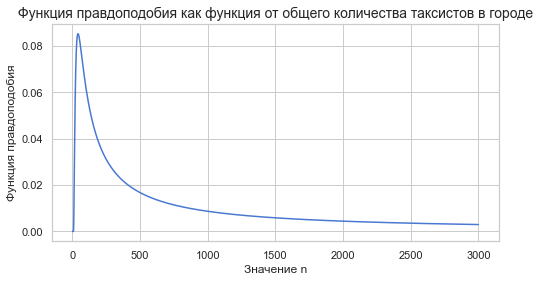

In [197]:
plt.plot(x, L(x))
plt.title('Функция правдоподобия как функция от общего количества таксистов в городе', fontsize=14)
plt.ylabel("Функция правдоподобия", fontsize=12)
plt.xlabel("Значение n", fontsize=12);

Максимизировать удобнее всего в WolframAlpha. Здесь разных таксистов в городе как минимум 9.

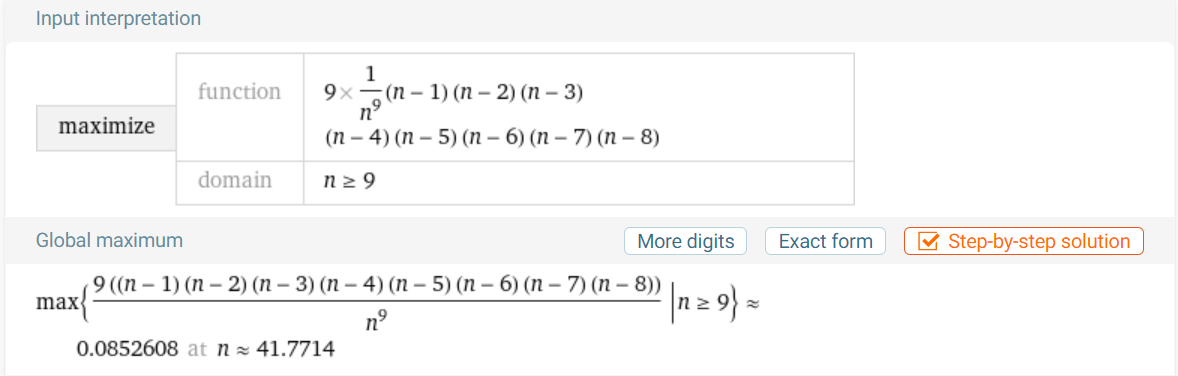

Значит, оценка $n$ методом максимального правдоподобия равна 42.

**Задание 2.а**

Среди 10 увиденных таксистов 6 имеют уникальные имена, 4 - имена-повторы. Рассмотрим несколько случаев увидеть 6 разных имён, чтобы определить функцию правдоподобия.

1) Пусть мы встретили первого таксиста с именем Катя, потом ещё 4 таксиста с таким именем (только один вариант для повтора, если мы видели только одно имя), а потом 5 таксистов с другими разными именами, всего 10 таксистов и 6 разных имён. Тогда функция правдоподобия выглядит так:

$L_1 = 1 \cdot \frac{1}{n} \cdot \frac{1}{n} \cdot \frac{1}{n} \cdot \frac{1}{n} \cdot \frac{n-1}{n} \cdot \frac{n-2}{n}  \cdot \frac{n-3}{n} \cdot \frac{n-4}{n}  \cdot \frac{n-5}{n} $

2) Пусть мы встретили первого таксиста с именем Катя, потом 5 таксистов с другими разными именами, а потом 4 таксиста подряд с именами, которые мы уже видели (6 вариантов для повтора, т.к. знаем 6 уникальных имён). Тогда функция правдоподобия выглядит так:

$L_2 = 1 \cdot \frac{n-1}{n} \cdot \frac{n-2}{n}  \cdot \frac{n-3}{n} \cdot \frac{n-4}{n}  \cdot \frac{n-5}{n}  \cdot \frac{6}{n} \cdot \frac{6}{n} \cdot \frac{6}{n} \cdot \frac{6}{n} \cdot$

3) Рассмотрим ещё одну функцию правдоподобия, подходящую под условие задачи. Так же всего увидим 6 уникальных имён.

$L_3 = 1 \cdot \frac{n-1}{n} \cdot \frac{n-2}{n} \cdot \frac{3}{n} \cdot  \frac{3}{n} \cdot \frac{n-3}{n} \cdot \frac{4}{n} \cdot \frac{n-4}{n} \cdot \frac{n-5}{n} \cdot \frac{6}{n} $

Заметим, что такая функция всегда имеет множители $\frac{n-1}{n} \cdot \frac{n-2}{n}  \cdot \frac{n-3}{n} \cdot \frac{n-4}{n}  \cdot \frac{n-5}{n} \cdot \frac{1}{n^4}$, которые определяются необходимым числом повторов и уникальных имён. Дополнительно указанная выше дробь умножается на сумму целых чисел, то есть константу $C$, которую можно найти в каждом случае, если вынести $\frac{1}{n}$ за скобки для множителей без $n$ в числителе в функциях $L_i$. Эта константа зависит от номеров заказов, на которых мы видим повторяющиеся имена.

Для решения задачи оптимизаци мы могли бы в каждом случае делить полученную функцию правдоподобия типа $L_i$ на $C$, и ответ бы в общем случае не поменялся. Тогда выпишем общий вид функции, которую надо максимизировать:

L = $\frac{(n-1)(n-2)(n-3)(n-4)(n-5)}{n^9}$

Построим график функции.

In [239]:
def L_name(n):
    L_nym = 1 / (n**4)
    for k in range(1, 6):
        L_nym *= (n - k) / n
    return L_nym

In [241]:
y = np.arange(6, 80)

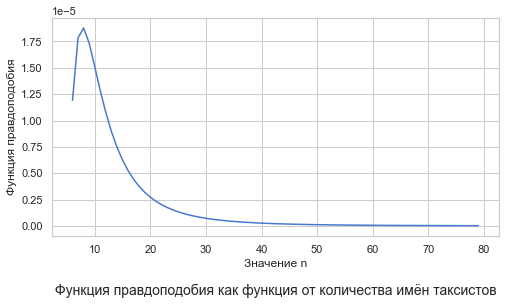

In [248]:
plt.plot(y, L_name(y))
plt.title('Функция правдоподобия как функция от количества имён таксистов', fontsize=14, y =-0.3)
plt.ylabel("Функция правдоподобия", fontsize=12)
plt.xlabel("Значение n", fontsize=12);

Максимизируем также в WolframAlpha.

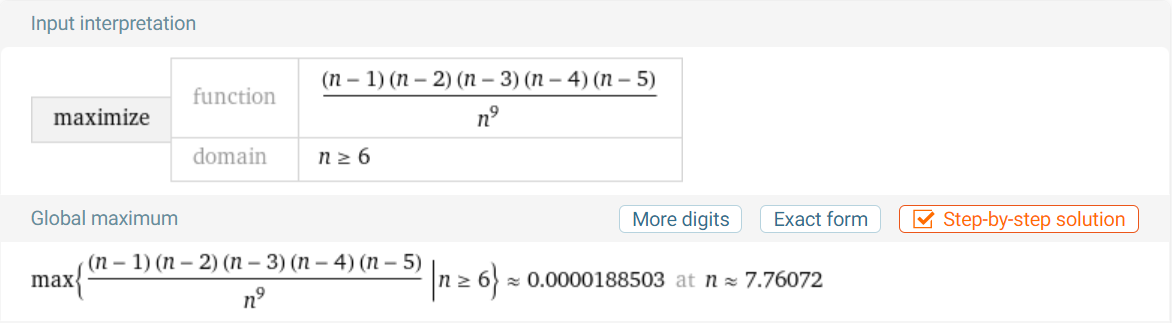

Значит, оценка $n$ методом максимального правдоподобия равна 8.